In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import importlib

In [2]:
max_size = 65
shots = 8192

In [3]:
def P(n, shots, hist):
    assert n == len(list(hist.keys())[0])
    count = 0
    count += hist.get("0" * n, 0) / shots
    count += hist.get("1" * n, 0) / shots
    return count

In [4]:
def S_phi(n, shots, hist):
    assert n == len(list(hist.keys())[0])
    return hist.get("0" * n, 0) / shots

In [5]:
def C(n, shots, hists):
    assert n == len(list(hists[0].keys())[0])
    iq = 0
    for i, hist in enumerate(hists):
        phi = (np.pi * i) / (n + 1)
        iq += cmath.exp(phi * n * 1j) * S_phi(n, shots, hist)
    iq = abs(iq) / len(hists)
    return 2 * np.sqrt(iq)

In [6]:
raw_fidelities = []
for n in range(1, max_size + 1):
    with open("./pkls/raw_results/results_" + str(n) + "-qubit.pkl", "rb") as f:
        raw_results = pickle.load(f)
    p = P(n, shots, raw_results["ghz"].get_counts())
    c = C(n, shots, raw_results["mqc"].get_counts())
    raw_fidelities.append((p + c) / 2)
    print(n, "qubit finished (fidelity: ", (p + c) / 2, ")")

1 qubit finished (fidelity:  0.9781480933391612 )
2 qubit finished (fidelity:  0.9262476309574024 )
3 qubit finished (fidelity:  0.9024880461665934 )
4 qubit finished (fidelity:  0.8866403026693108 )
5 qubit finished (fidelity:  0.8175949269590566 )
6 qubit finished (fidelity:  0.8060482921026799 )
7 qubit finished (fidelity:  0.7428452423395482 )
8 qubit finished (fidelity:  0.7566284421793181 )
9 qubit finished (fidelity:  0.6928404863971629 )
10 qubit finished (fidelity:  0.6830492236034194 )
11 qubit finished (fidelity:  0.6679700093018798 )
12 qubit finished (fidelity:  0.6651908753605067 )
13 qubit finished (fidelity:  0.6410263752214941 )
14 qubit finished (fidelity:  0.602679419729563 )
15 qubit finished (fidelity:  0.562931231725335 )
16 qubit finished (fidelity:  0.5539672899267623 )
17 qubit finished (fidelity:  0.5276529402676549 )
18 qubit finished (fidelity:  0.495135803505482 )
19 qubit finished (fidelity:  0.47397254695849866 )
20 qubit finished (fidelity:  0.1979127056

In [7]:
lnp_fidelities = []
for n in range(1, max_size + 1):
    with open("./pkls/lnp/info_" + str(n) + "-qubit.pkl", "rb") as f:
        lnp_info = pickle.load(f)
    p = P(n, shots, lnp_info["ghz"]["mitigated_hist"])
    c = C(n, shots, [info["mitigated_hist"] for info in lnp_info["mqc"]])
    lnp_fidelities.append((p + c) / 2)
    print(n, "qubit finished (fidelity: ", (p + c) / 2, ")")

1 qubit finished (fidelity:  1.0002906257659503 )
2 qubit finished (fidelity:  0.9871681155485175 )
3 qubit finished (fidelity:  0.9794503873662914 )
4 qubit finished (fidelity:  0.9673763867314096 )
5 qubit finished (fidelity:  0.9310583487677851 )
6 qubit finished (fidelity:  0.924097053261052 )
7 qubit finished (fidelity:  0.8685119404093837 )
8 qubit finished (fidelity:  0.8940978587081417 )
9 qubit finished (fidelity:  0.8250867213411612 )
10 qubit finished (fidelity:  0.8192895681185438 )
11 qubit finished (fidelity:  0.8137612053232868 )
12 qubit finished (fidelity:  0.8294850543149328 )
13 qubit finished (fidelity:  0.8141184550500706 )
14 qubit finished (fidelity:  0.7678332380754637 )
15 qubit finished (fidelity:  0.7242840286279186 )
16 qubit finished (fidelity:  0.7244061402494486 )
17 qubit finished (fidelity:  0.7084505941581729 )
18 qubit finished (fidelity:  0.6793220911413194 )
19 qubit finished (fidelity:  0.6553711838865006 )
20 qubit finished (fidelity:  0.281428120

In [9]:
raw_S_phis_list = []
for n in range(1, max_size + 1):
    with open("./pkls/raw_results/results_" + str(n) + "-qubit.pkl", "rb") as f:
        raw_results = pickle.load(f)
    raw_S_phis = []
    for i, hist in enumerate(raw_results["mqc"].get_counts()):
        raw_S_phis.append(S_phi(n, shots, hist))
    raw_S_phis_list.append(raw_S_phis)
    print(n, "qubit finished")

1 qubit finished
2 qubit finished
3 qubit finished
4 qubit finished
5 qubit finished
6 qubit finished
7 qubit finished
8 qubit finished
9 qubit finished
10 qubit finished
11 qubit finished
12 qubit finished
13 qubit finished
14 qubit finished
15 qubit finished
16 qubit finished
17 qubit finished
18 qubit finished
19 qubit finished
20 qubit finished
21 qubit finished
22 qubit finished
23 qubit finished
24 qubit finished
25 qubit finished
26 qubit finished
27 qubit finished
28 qubit finished
29 qubit finished
30 qubit finished
31 qubit finished
32 qubit finished
33 qubit finished
34 qubit finished
35 qubit finished
36 qubit finished
37 qubit finished
38 qubit finished
39 qubit finished
40 qubit finished
41 qubit finished
42 qubit finished
43 qubit finished
44 qubit finished
45 qubit finished
46 qubit finished
47 qubit finished
48 qubit finished
49 qubit finished
50 qubit finished
51 qubit finished
52 qubit finished
53 qubit finished
54 qubit finished
55 qubit finished
56 qubit finished
5

In [10]:
lnp_S_phis_list = []
for n in range(1, max_size + 1):
    with open("./pkls/lnp/info_" + str(n) + "-qubit.pkl", "rb") as f:
        lnp_info = pickle.load(f)
    lnp_S_phis = []
    for i, hist in enumerate([info["mitigated_hist"] for info in lnp_info["mqc"]]):
        lnp_S_phis.append(S_phi(n, shots, hist))
    lnp_S_phis_list.append(lnp_S_phis)
    print(n, "qubit finished")

1 qubit finished
2 qubit finished
3 qubit finished
4 qubit finished
5 qubit finished
6 qubit finished
7 qubit finished
8 qubit finished
9 qubit finished
10 qubit finished
11 qubit finished
12 qubit finished
13 qubit finished
14 qubit finished
15 qubit finished
16 qubit finished
17 qubit finished
18 qubit finished
19 qubit finished
20 qubit finished
21 qubit finished
22 qubit finished
23 qubit finished
24 qubit finished
25 qubit finished
26 qubit finished
27 qubit finished
28 qubit finished
29 qubit finished
30 qubit finished
31 qubit finished
32 qubit finished
33 qubit finished
34 qubit finished
35 qubit finished
36 qubit finished
37 qubit finished
38 qubit finished
39 qubit finished
40 qubit finished
41 qubit finished
42 qubit finished
43 qubit finished
44 qubit finished
45 qubit finished
46 qubit finished
47 qubit finished
48 qubit finished
49 qubit finished
50 qubit finished
51 qubit finished
52 qubit finished
53 qubit finished
54 qubit finished
55 qubit finished
56 qubit finished
5

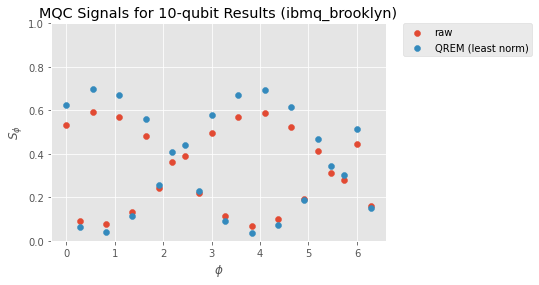

In [23]:
n = 10
plt.style.use("ggplot")
plt.scatter(np.linspace(0, 2 * np.pi, len(raw_S_phis_list[n])), raw_S_phis_list[n], label="raw")
plt.scatter(np.linspace(0, 2 * np.pi, len(lnp_S_phis_list[n])), lnp_S_phis_list[n], label="QREM (least norm)")
plt.xlabel(r'$\phi$')
plt.ylabel(r'$S_{\phi}$')
plt.ylim(0, 1)
plt.title("MQC Signals for " + str(n) + "-qubit Results (ibmq_brooklyn)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

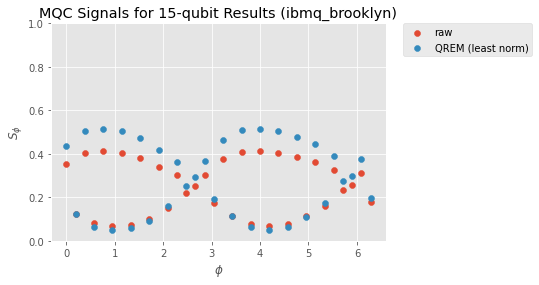

In [24]:
n = 15
plt.style.use("ggplot")
plt.scatter(np.linspace(0, 2 * np.pi, len(raw_S_phis_list[n])), raw_S_phis_list[n], label="raw")
plt.scatter(np.linspace(0, 2 * np.pi, len(lnp_S_phis_list[n])), lnp_S_phis_list[n], label="QREM (least norm)")
plt.xlabel(r'$\phi$')
plt.ylabel(r'$S_{\phi}$')
plt.ylim(0, 1)
plt.title("MQC Signals for " + str(n) + "-qubit Results (ibmq_brooklyn)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

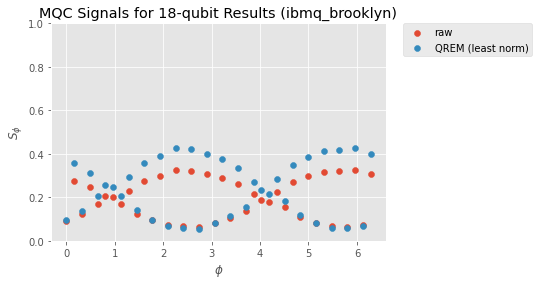

In [25]:
n = 18
plt.style.use("ggplot")
plt.scatter(np.linspace(0, 2 * np.pi, len(raw_S_phis_list[n])), raw_S_phis_list[n], label="raw")
plt.scatter(np.linspace(0, 2 * np.pi, len(lnp_S_phis_list[n])), lnp_S_phis_list[n], label="QREM (least norm)")
plt.xlabel(r'$\phi$')
plt.ylabel(r'$S_{\phi}$')
plt.ylim(0, 1)
plt.title("MQC Signals for " + str(n) + "-qubit Results (ibmq_brooklyn)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

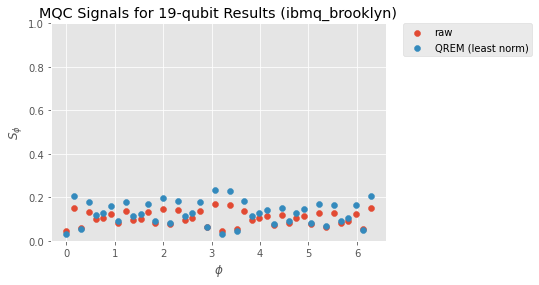

In [26]:
n = 19
plt.style.use("ggplot")
plt.scatter(np.linspace(0, 2 * np.pi, len(raw_S_phis_list[n])), raw_S_phis_list[n], label="raw")
plt.scatter(np.linspace(0, 2 * np.pi, len(lnp_S_phis_list[n])), lnp_S_phis_list[n], label="QREM (least norm)")
plt.xlabel(r'$\phi$')
plt.ylabel(r'$S_{\phi}$')
plt.ylim(0, 1)
plt.title("MQC Signals for " + str(n) + "-qubit Results (ibmq_brooklyn)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

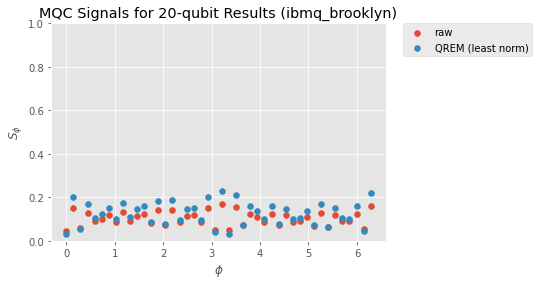

In [27]:
n = 20
plt.style.use("ggplot")
plt.scatter(np.linspace(0, 2 * np.pi, len(raw_S_phis_list[n])), raw_S_phis_list[n], label="raw")
plt.scatter(np.linspace(0, 2 * np.pi, len(lnp_S_phis_list[n])), lnp_S_phis_list[n], label="QREM (least norm)")
plt.xlabel(r'$\phi$')
plt.ylabel(r'$S_{\phi}$')
plt.ylim(0, 1)
plt.title("MQC Signals for " + str(n) + "-qubit Results (ibmq_brooklyn)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

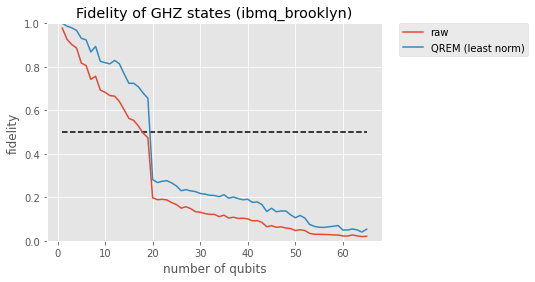

In [38]:
plt.style.use("ggplot")
plt.plot([1, max_size], [0.5, 0.5], linestyle="--", color="Black")
plt.plot(range(1, max_size + 1), raw_fidelities, label="raw")
plt.plot(range(1, max_size + 1), lnp_fidelities, label="QREM (least norm)")
plt.xlabel("number of qubits")
plt.ylabel("fidelity")
plt.ylim(0, 1)
plt.title("Fidelity of GHZ states (ibmq_brooklyn)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [29]:
from qiskit.visualization import plot_error_map

In [32]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')
print(provider)
device = provider.backend.ibmq_brooklyn
backend = provider.get_backend('ibmq_brooklyn')

<AccountProvider for IBMQ(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')>


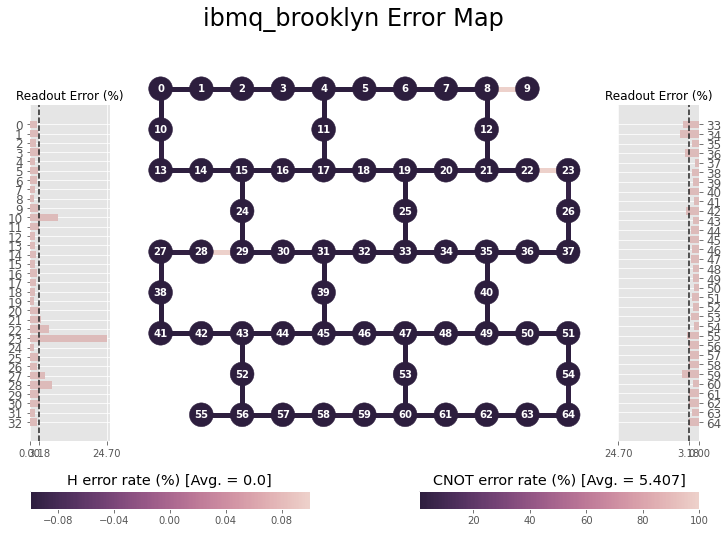

In [33]:
plot_error_map(device)